In [84]:
import yfinance as yf
import numpy as np
import pandas as pd
# importando autocorrelcao para ver quantos legs tem uma correlcao
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
bitcoin = yf.download('BTC-USD')
bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039062,28847.710938,28847.710938,15548678514
2023-05-05,28851.480469,29668.908203,28845.509766,29534.384766,29534.384766,17936566518


In [86]:
bitcoin_df = pd.DataFrame(bitcoin)
bitcoin_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039062,28847.710938,28847.710938,15548678514
2023-05-05,28851.480469,29668.908203,28845.509766,29534.384766,29534.384766,17936566518


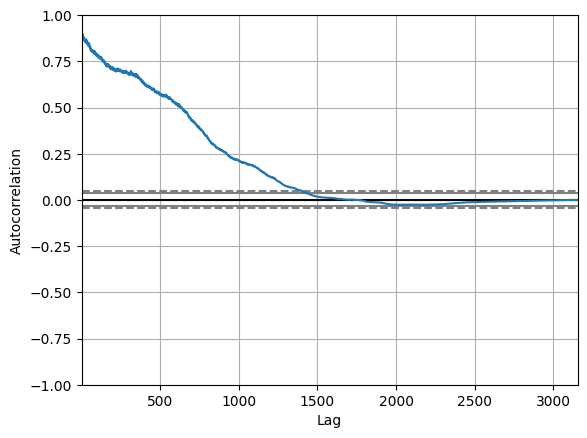

In [87]:
autocorrelation_plot(bitcoin_df)
plt.show()

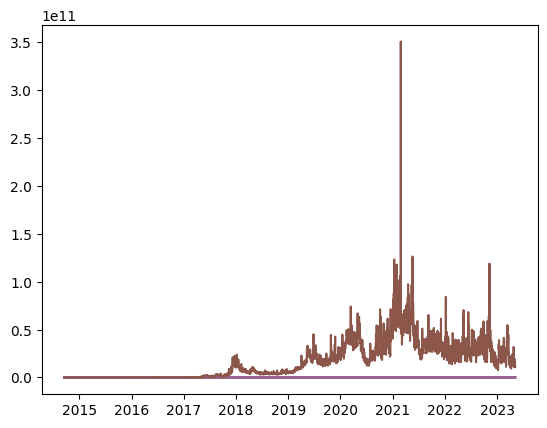

In [88]:
plt.plot(bitcoin)
plt.show()

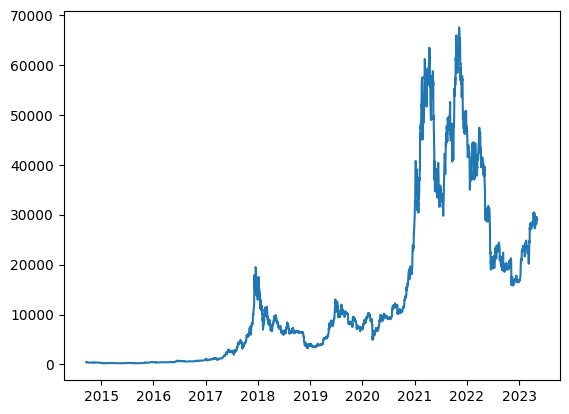

In [89]:
plt.plot(bitcoin.index, bitcoin['Adj Close'])
plt.show()

In [90]:
# train test split 
# vou usar um treino de 90%
split = int(len(bitcoin)*0.9)
train = list(bitcoin[0:split]['Adj Close'])
test = list(bitcoin[split:]['Adj Close'])

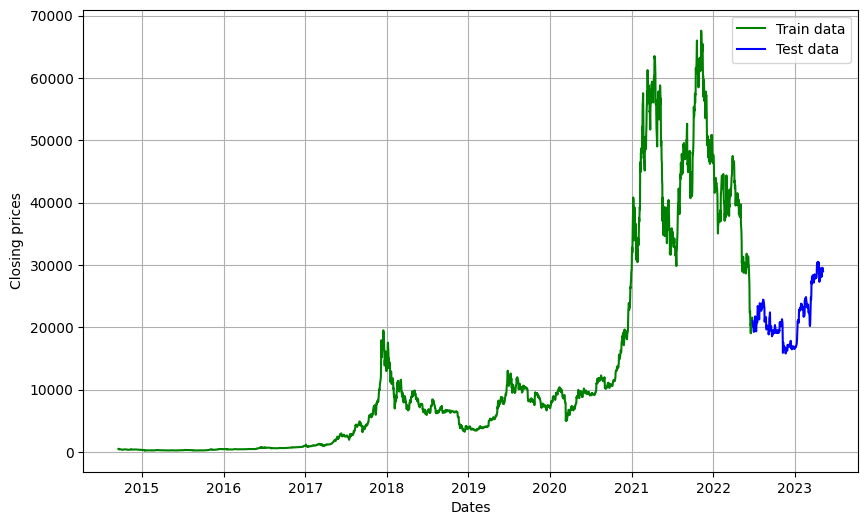

In [91]:
# split data into train and test set 
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(bitcoin[0:split]['Adj Close'], 'green', label='Train data')
plt.plot(bitcoin[split:]['Adj Close'], 'blue', label='Test data')
plt.legend()

In [92]:
# modelo de previsão
model_predictions = []
n_test_observation = len(test)

In [99]:
# fazendo o loop para rodar o ARIMA
for i in range(n_test_observation):
    model = ARIMA(train, order=(4,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)

In [101]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3155
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -25515.314
Date:                Sun, 07 May 2023   AIC                          51040.627
Time:                        17:10:30   BIC                          51070.910
Sample:                             0   HQIC                         51051.492
                               - 3155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0247      0.009     -2.648      0.008      -0.043      -0.006
ar.L2          0.0075      0.009      0.838      0.402      -0.010       0.025
ar.L3          0.0205      0.010      2.148      0.0

In [104]:
len(test)

316

In [105]:
len(model_predictions)

434

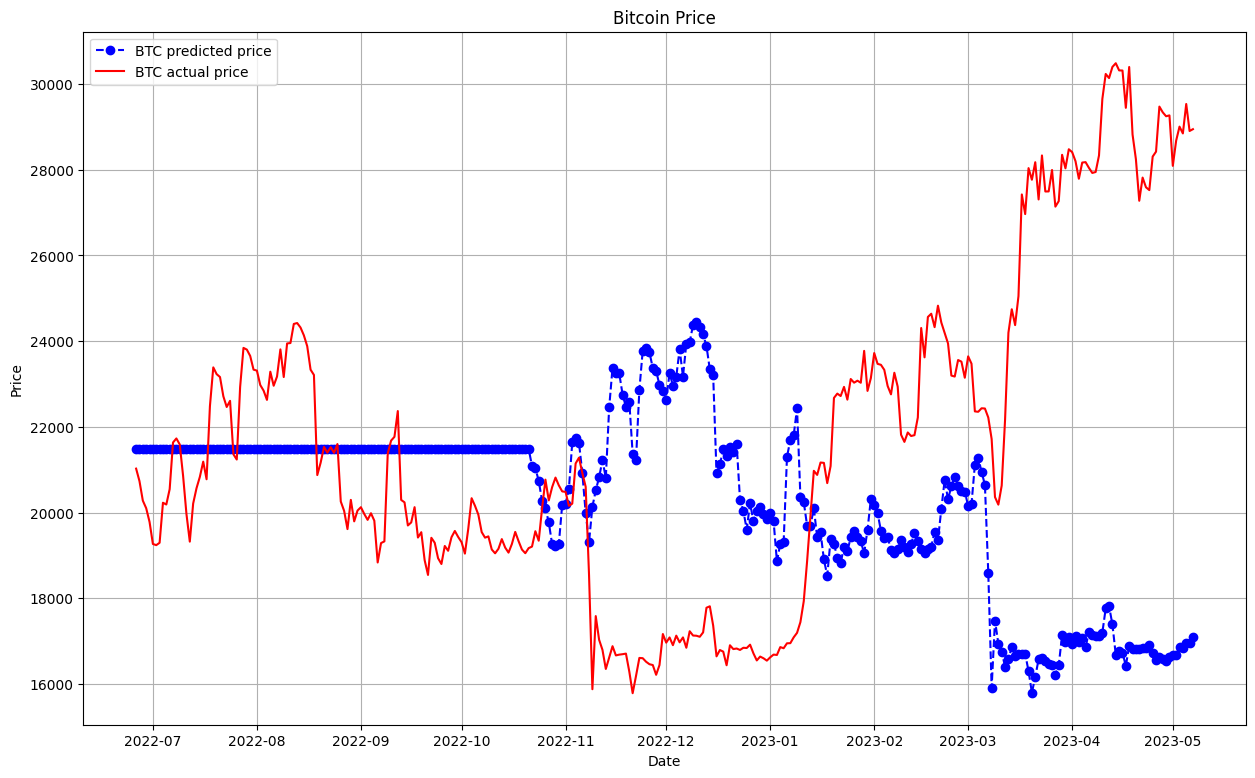

In [106]:
plt.figure(figsize=(15,9))
plt.grid()
bitcoin_test_range = bitcoin[split:].index
plt.plot(bitcoin_test_range, model_predictions[:-118], color='blue', marker= 'o', linestyle= 'dashed', label='BTC predicted price')
plt.plot(bitcoin_test_range, test, color='red', label='BTC actual price')

plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [107]:
# calculando o Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions[:-118]) - np.array(test)) / np.abs(test))
print(f'MAPE {mape}')

MAPE 0.15796756097730538


In [112]:
result = (mape * 100) - 100
print(f'Quer dizer que o modelo tem {round(abs(result),2)}% de precisão')

Quer dizer que o modelo tem 84.2% de precisão
